<a href="https://colab.research.google.com/github/saradjurovic90/domaci1/blob/main/adis_projekat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Učitavanje biblioteka

# Učitavanje potrebnih biblioteka
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [ ]:
# Učitavanje podataka iz Excel fajla
file_path = '/content/dataset.xlsx'
df = pd.read_excel(file_path)

# Prikaz podataka
print("Prikaz podataka iz dataset-a:")
print(df.head())

# Provjera nedostajućih vrijednosti
print("\nNedostajuće vrijednosti po atributima:")
print(df.isnull().sum())


Prikaz podataka iz dataset-a:
    Age  Gender  Height  Weight        CALC FAVC  FCVC  NCP  SCC SMOKE  CH2O  \
0  21.0  Female    1.62    64.0          no   no   2.0  3.0   no    no   2.0   
1  21.0  Female    1.52    56.0   Sometimes   no   3.0  3.0  yes   yes   3.0   
2  23.0    Male    1.80    77.0  Frequently   no   2.0  3.0   no    no   2.0   
3  27.0    Male    1.80    87.0  Frequently   no   3.0  3.0   no    no   2.0   
4  22.0    Male    1.78    89.8   Sometimes   no   2.0  1.0   no    no   2.0   

  family_history_with_overweight  FAF  TUE       CAEC                 MTRANS  \
0                            yes  0.0  1.0  Sometimes  Public_Transportation   
1                            yes  3.0  0.0  Sometimes  Public_Transportation   
2                            yes  2.0  1.0  Sometimes  Public_Transportation   
3                             no  2.0  0.0  Sometimes                Walking   
4                             no  0.0  0.0  Sometimes  Public_Transportation   

        

In [ ]:
# Definisanje X i y
X = pd.get_dummies(df.drop('NObeyesdad', axis=1))
y = df['NObeyesdad']

# Prikaz osobina i cilja
print("\nObrađene osobine:")
print(X.head())
print("\nCiljna varijabla:")
print(y.head())

# Podjela skupa na trening i test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Obrađene osobine:
    Age  Height  Weight  FCVC  NCP  CH2O  FAF  TUE  Gender_Female  \
0  21.0    1.62    64.0   2.0  3.0   2.0  0.0  1.0           True   
1  21.0    1.52    56.0   3.0  3.0   3.0  3.0  0.0           True   
2  23.0    1.80    77.0   2.0  3.0   2.0  2.0  1.0          False   
3  27.0    1.80    87.0   3.0  3.0   2.0  2.0  0.0          False   
4  22.0    1.78    89.8   2.0  1.0   2.0  0.0  0.0          False   

   Gender_Male  ...  family_history_with_overweight_yes  CAEC_Always  \
0        False  ...                                True        False   
1        False  ...                                True        False   
2         True  ...                                True        False   
3         True  ...                               False        False   
4         True  ...                               False        False   

   CAEC_Frequently  CAEC_Sometimes  CAEC_no  MTRANS_Automobile  MTRANS_Bike  \
0            False            True    False           

In [ ]:
# Treniranje modela
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Predikcija
y_pred = model.predict(X_test)

# Evaluacija
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Klasifikacioni izvještaj:')
print(report)


Accuracy: 0.6309148264984227
Klasifikacioni izvještaj:
                     precision    recall  f1-score   support

Insufficient_Weight       0.84      0.62      0.71        86
      Normal_Weight       0.49      0.40      0.44        93
     Obesity_Type_I       0.55      0.28      0.37       102
    Obesity_Type_II       0.88      0.76      0.82        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.49      0.62      0.55        88
Overweight_Level_II       0.39      0.78      0.52        79

           accuracy                           0.63       634
          macro avg       0.66      0.64      0.63       634
       weighted avg       0.67      0.63      0.63       634



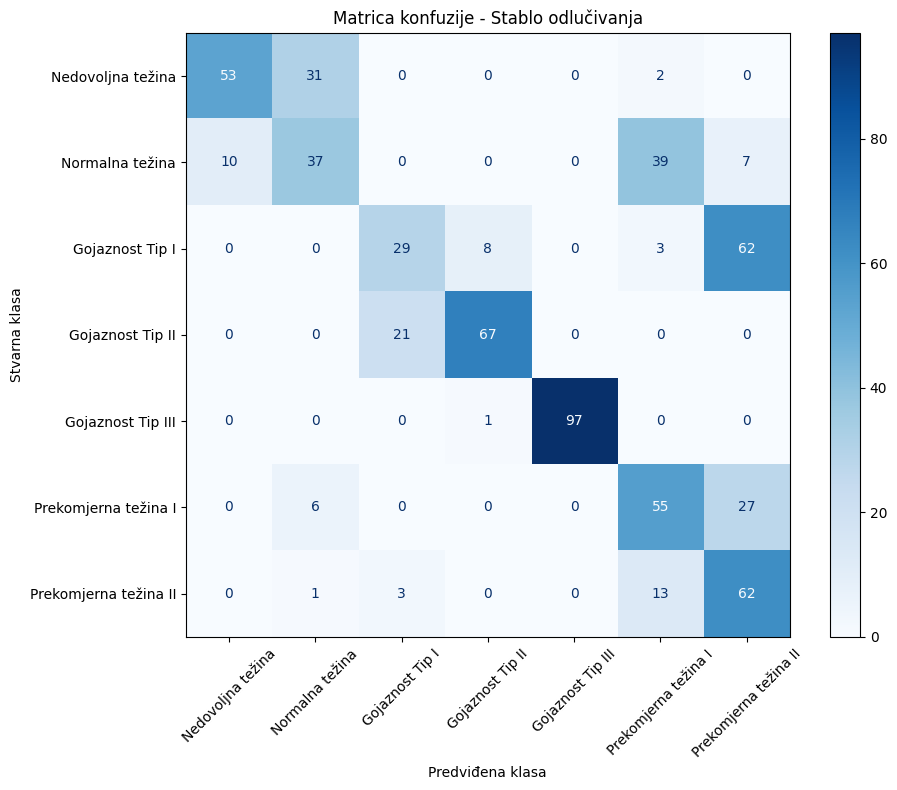

In [ ]:
# Matrica konfuzije stabla odlucivanja

# Rječnik za prevod klasa
label_translation = {
    'Insufficient_Weight': 'Nedovoljna težina',
    'Normal_Weight': 'Normalna težina',
    'Obesity_Type_I': 'Gojaznost Tip I',
    'Obesity_Type_II': 'Gojaznost Tip II',
    'Obesity_Type_III': 'Gojaznost Tip III',
    'Overweight_Level_I': 'Prekomjerna težina I',
    'Overweight_Level_II': 'Prekomjerna težina II'
}
# Prevedene klase u istom redosledu kao model.classes_
translated_labels = [label_translation[cls] for cls in model.classes_]

# Matrica konfuzije za stablo odlučivanja (Decision Tree)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=translated_labels)
disp.plot(cmap=plt.cm.Blues, ax=ax, xticks_rotation=45)  # rotacija etiketa na X-osi
ax.set_title("Matrica konfuzije - Stablo odlučivanja")
ax.set_xlabel("Predviđena klasa")
ax.set_ylabel("Stvarna klasa")
plt.tight_layout()
plt.show()

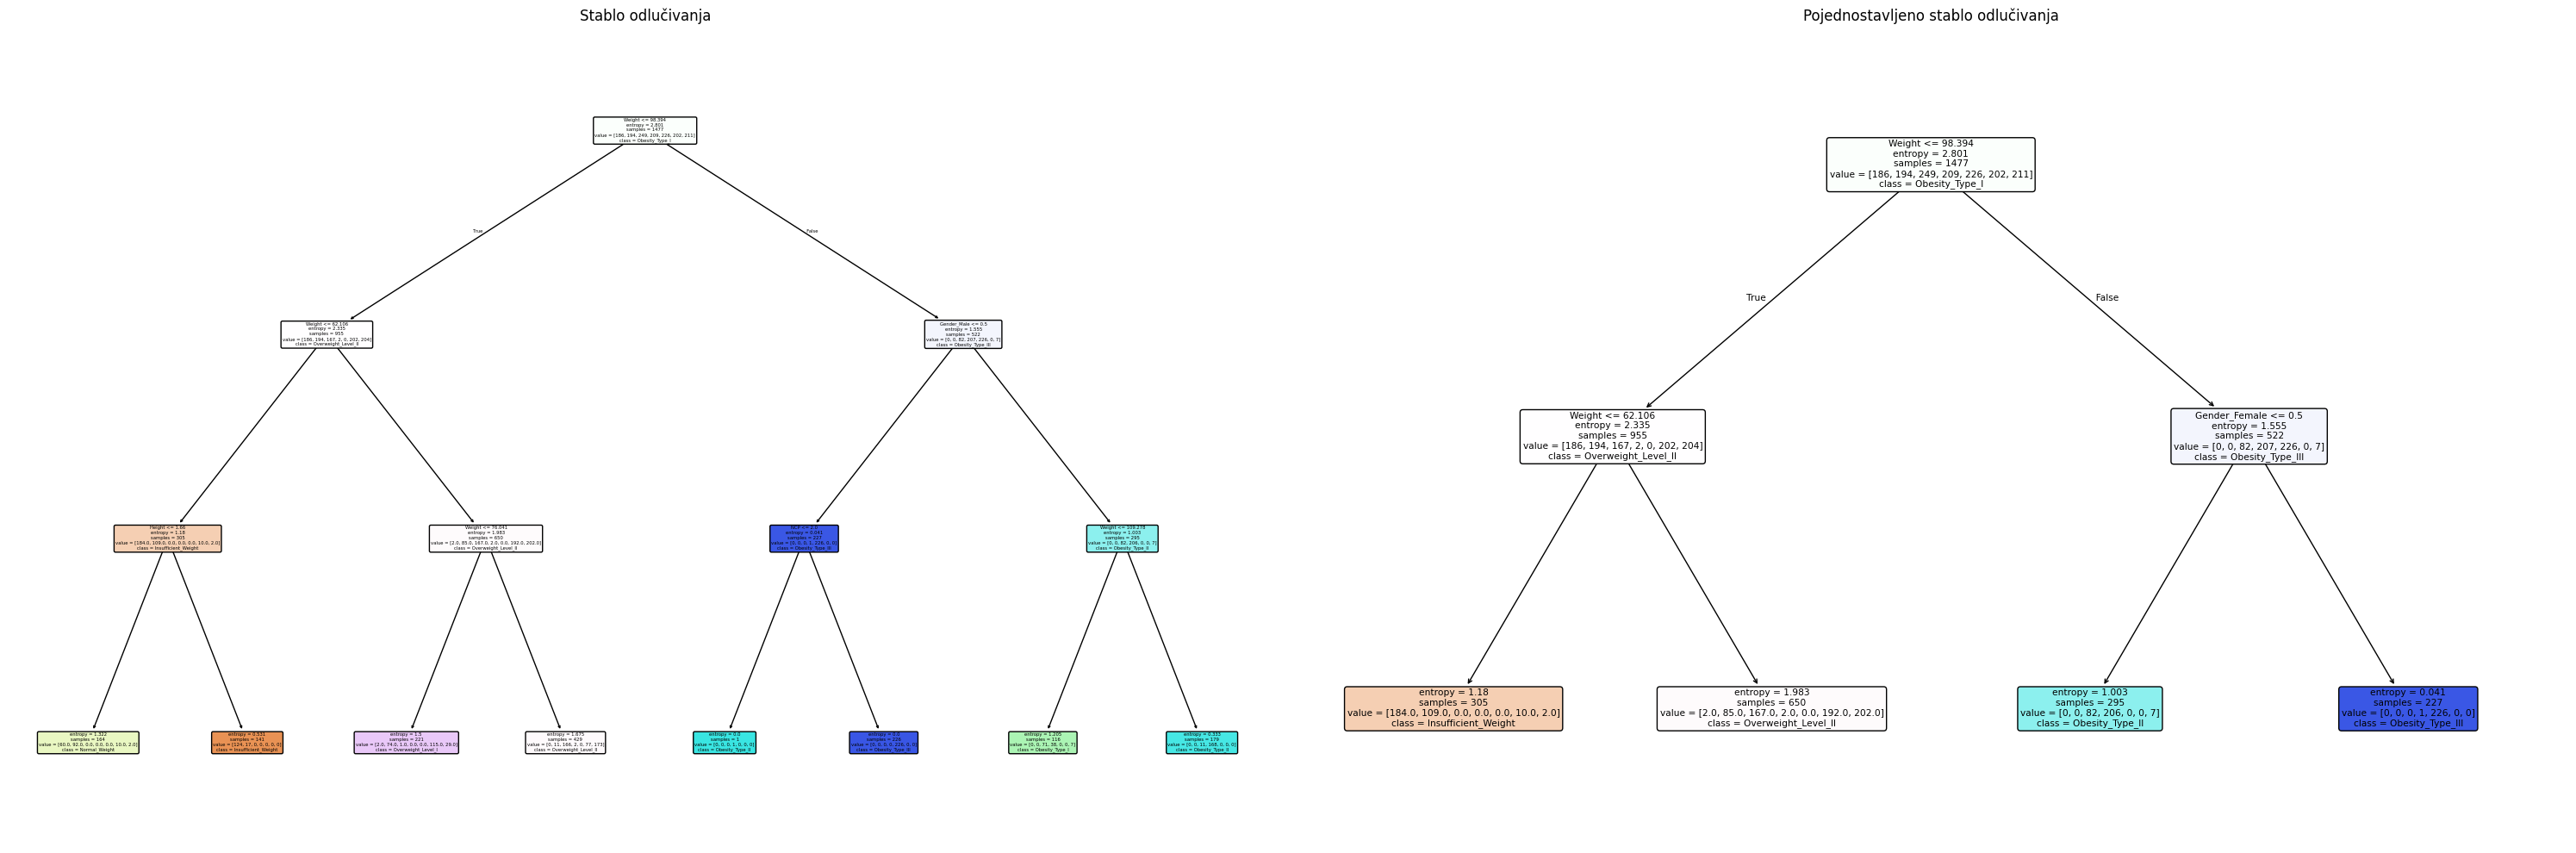

In [ ]:
# Treniranje modela i jednostavnog modela
model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

model_simple = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)
model_simple.fit(X_train, y_train)

# Prikaz oba stabla u jednom redu
fig, axes = plt.subplots(1, 2, figsize=(30, 10))

# Cjelokupno stablo
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True, ax=axes[0])
axes[0].set_title("Stablo odlučivanja")

# Pojednostavljeno stablo
plot_tree(model_simple, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True, ax=axes[1])
axes[1].set_title("Pojednostavljeno stablo odlučivanja")

plt.tight_layout()
plt.show()

In [ ]:
# RANDOM FOREST
from sklearn.ensemble import RandomForestClassifier

# Treniranje Random Forest modela
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_model.fit(X_train, y_train)

# Predikcija
rf_pred = rf_model.predict(X_test)

# Evaluacija
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_report = classification_report(y_test, rf_pred)

print(f"\nRandom Forest Accuracy: {rf_accuracy}")
print("Klasifikacioni izvještaj (Random Forest):")
print(rf_report)


Random Forest Accuracy: 0.919558359621451
Klasifikacioni izvještaj (Random Forest):
                     precision    recall  f1-score   support

Insufficient_Weight       0.94      0.93      0.94        86
      Normal_Weight       0.79      0.88      0.83        93
     Obesity_Type_I       0.97      0.93      0.95       102
    Obesity_Type_II       0.96      0.98      0.97        88
   Obesity_Type_III       1.00      0.99      0.99        98
 Overweight_Level_I       0.89      0.81      0.85        88
Overweight_Level_II       0.90      0.91      0.91        79

           accuracy                           0.92       634
          macro avg       0.92      0.92      0.92       634
       weighted avg       0.92      0.92      0.92       634



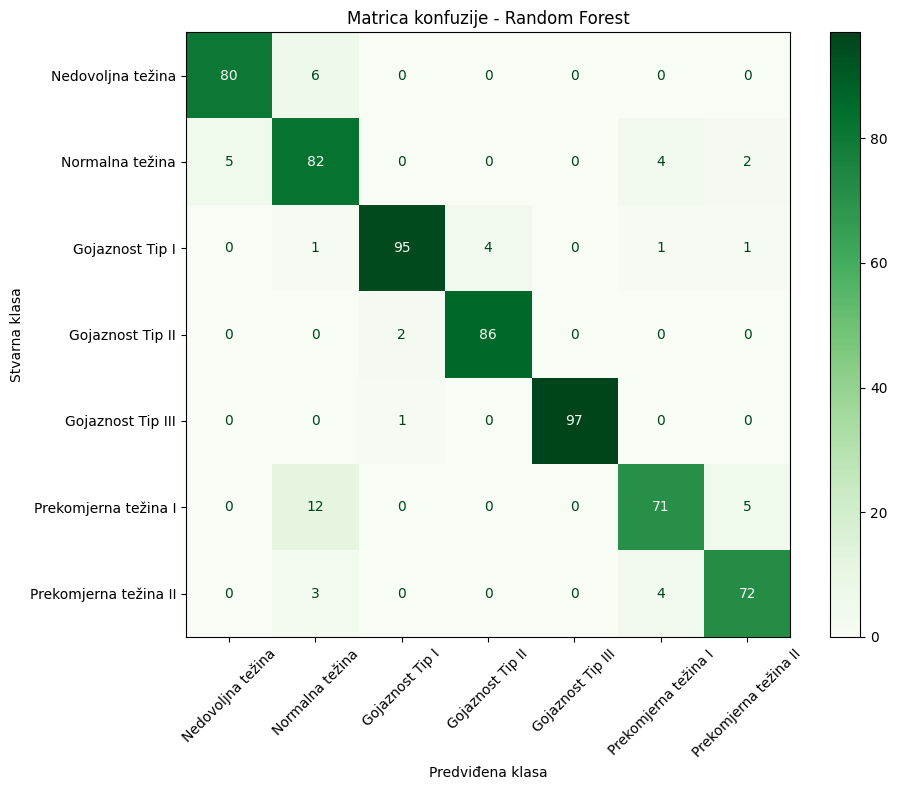

In [ ]:
# Rječnik za prevod klasa
label_translation = {
    'Insufficient_Weight': 'Nedovoljna težina',
    'Normal_Weight': 'Normalna težina',
    'Obesity_Type_I': 'Gojaznost Tip I',
    'Obesity_Type_II': 'Gojaznost Tip II',
    'Obesity_Type_III': 'Gojaznost Tip III',
    'Overweight_Level_I': 'Prekomjerna težina I',
    'Overweight_Level_II': 'Prekomjerna težina II'
}

# Prevedene klase u istom redosledu kao rf_model.classes_
translated_labels = [label_translation[cls] for cls in rf_model.classes_]

# Matrica konfuzije sa prevedenim oznakama i iskosenim tekstom
rf_cm = confusion_matrix(y_test, rf_pred)
fig, ax = plt.subplots(figsize=(10, 8))
disp = ConfusionMatrixDisplay(confusion_matrix=rf_cm, display_labels=translated_labels)
disp.plot(cmap=plt.cm.Greens, ax=ax, xticks_rotation=45)  # rotacija etiketa na X-osi
ax.set_title("Matrica konfuzije - Random Forest")
ax.set_xlabel("Predviđena klasa")
ax.set_ylabel("Stvarna klasa")
plt.tight_layout()
plt.show()


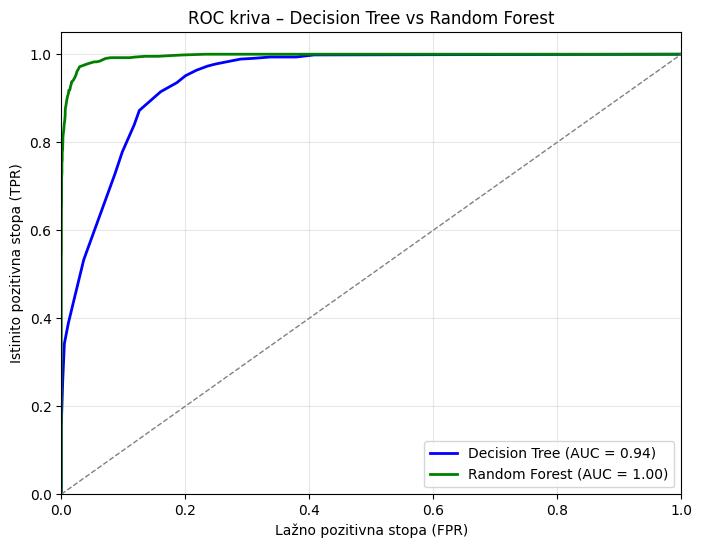

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# AUC kriva

# Binarizacija ciljne promenljive (potrebno za ROC krive sa više klasa)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

# Predikcija verovatnoća
dt_probs = model.predict_proba(X_test)
rf_probs = rf_model.predict_proba(X_test)

# Računanje ROC krivih i AUC za svaki model po svim klasama
fpr_dt = dict()
tpr_dt = dict()
roc_auc_dt = dict()

fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(n_classes):
    fpr_dt[i], tpr_dt[i], _ = roc_curve(y_test_bin[:, i], dt_probs[:, i])
    roc_auc_dt[i] = auc(fpr_dt[i], tpr_dt[i])

    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_test_bin[:, i], rf_probs[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Mikro-prosečna ROC kriva i AUC
fpr_dt["micro"], tpr_dt["micro"], _ = roc_curve(y_test_bin.ravel(), dt_probs.ravel())
roc_auc_dt["micro"] = auc(fpr_dt["micro"], tpr_dt["micro"])

fpr_rf["micro"], tpr_rf["micro"], _ = roc_curve(y_test_bin.ravel(), rf_probs.ravel())
roc_auc_rf["micro"] = auc(fpr_rf["micro"], tpr_rf["micro"])

# Prikazivanje ROC krivih
plt.figure(figsize=(8, 6))
plt.plot(fpr_dt["micro"], tpr_dt["micro"], color='blue', lw=2,
         label=f'Decision Tree (AUC = {roc_auc_dt["micro"]:.2f})')
plt.plot(fpr_rf["micro"], tpr_rf["micro"], color='green', lw=2,
         label=f'Random Forest (AUC = {roc_auc_rf["micro"]:.2f})')

plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Lažno pozitivna stopa (FPR)')
plt.ylabel('Istinito pozitivna stopa (TPR)')
plt.title('ROC kriva – Decision Tree vs Random Forest')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# Mapiranje naziva klasa
class_mapping = {
    'Insufficient_Weight': 'Nedovoljna_težina',
    'Normal_Weight': 'Normalna_težina',
    'Obesity_Type_I': 'Gojaznost Tip I',
    'Obesity_Type_II': 'Gojaznost Tip II',
    'Obesity_Type_III': 'Gojaznost Tip III',
    'Overweight_Level_I': 'Prekomjerna težina I',
    'Overweight_Level_II': 'Prekomjerna težina II'
}


In [ ]:
# Funkcija za unos i predikciju
def predict_new_sample():
    print("Unesi vrijednosti za novi uzorak:")
    sample = {
        'Age': float(input("Godine: ")),
        'Height': float(input("Visina (cm): ")),
        'Weight': float(input("Težina (kg): ")),
        'Gender': input("Pol (Male/Female): "),
        'family_history_with_overweight': input("Porodična istorija gojaznosti (Yes/No): "),
        'FAVC': input("Konzumacija visokokalorične hrane (Yes/No): "),
        'NCP': float(input("Broj obroka dnevno: ")),
        'CAEC': input("Užina (No/Sometimes/Frequently/Always): "),
        'SMOKE': input("Pušenje (Yes/No): "),
        'CH2O': float(input("Unos vode dnevno (litri): ")),
        'SCC': input("Pratiš li kalorije? (Yes/No): "),
        'FAF': float(input("Fizička aktivnost (0-7 dana): ")),
        'TUE': float(input("Vrijeme ispred ekrana (0-24 sati dnevno): ")),
        'CALC': input("Unos alkohola (No/Sometimes/Frequently/Always): "),
        'MTRANS': input("Transport (Automobile/Bike/Public_Transportation/Walking): ")
    }

    # Pretvaranje u DataFrame
    sample_df = pd.DataFrame([sample])
    sample_df = pd.get_dummies(sample_df)

    # Usklađivanje kolona sa treniranim modelom
    missing_cols = set(X.columns) - set(sample_df.columns)
    for col in missing_cols:
        sample_df[col] = 0
    sample_df = sample_df[X.columns]

    # Predikcija
    prediction = rf_model.predict(sample_df)   # predikcija preko Random Forest
    pred_class = prediction[0]
    prediction_mapped = class_mapping[pred_class]

    # Prikaz rezultata
    print(f'\nPredviđena klasa: {prediction_mapped}')

    # Personalizovani savjeti
    advice = {
        'Insufficient_Weight': (
            "Analiza: Vaša težina je ispod preporučene granice, što može ukazivati na hronični manjak kalorija, nutrijenata ili povećanu potrošnju energije.\n\n"
            "Ishrana: Preporučuje se povećanje dnevnog kalorijskog unosa za 300–500 kcal. Fokusirajte se na zdrav izvor masti (avokado, orašasti plodovi, maslinovo ulje), kompleksne ugljene hidrate (zob, integralni pirinač) i proteine (jaja, riba, mliječni proizvodi, piletina). Povećajte unos vitamina B kompleksa, željeza i zinka.\n\n"
            "Fizička aktivnost: Umjerena vježba sa opterećenjem (2–3x nedjeljno) pomaže u razvoju mišićne mase i apetita. Izbjegavajte kardio visokog intenziteta.\n\n"
            "Savjet: Konsultujte nutricionistu kako biste osmislili plan postepenog i zdravog dobijanja na težini."
        ),
        'Normal_Weight': (
            "Vaša težina je unutar optimalnog raspona. Cilj je održavanje ravnoteže između unosa i potrošnje energije.\n\n"
            "Ishrana: Fokusirajte se na balans unosa makronutrijenata (50% ugljeni hidrati, 25% masti, 25% proteini). Jedite raznovrsno: voće, povrće, mahunarke, riba, integralne žitarice. Mikronutrijenti koje treba redovno unositi uključuju magnezijum, vitamin D i kalcijum.\n\n"
            "Aktivnost: Preporučuje se 150 minuta umjerene fizičke aktivnosti sedmično (brzo hodanje, plivanje, biciklizam). Dodajte 2 dana vježbi snage (npr. pilates ili teretana).\n\n"
            "Stil života: Održavajte rutinu, spavajte 7–9h dnevno i izbjegavajte visoko obrađenu hranu."
        ),
        'Overweight_Level_I': (
            "Vaša težina prelazi poželjne granice, ali se nalazi u ranoj fazi prekomjerne težine.\n\n"
            "Ishrana: Fokusirajte se na unos vlakana (30–35g dnevno), povrća, nemasnih proteina i zdravih masti. Smanjite unos rafinisanih šećera, zasićenih masti i alkohola. Konzumirajte omega-3 izvore (laneno sjeme, losos) i dovoljno vitamina D.\n\n"
            "Aktivnost: Poželjno je 200–300 minuta umjerene fizičke aktivnosti nedjeljno (brzo hodanje, biciklizam, aerobik), uz 2 dana treninga snage.\n\n"
            "Preporuka: Počnite sa dnevnim dnevnikom ishrane i aktivnosti radi osvještavanja navika."
        ),
        'Overweight_Level_II': (
            "Vaša težina se nalazi u zoni izraženije prekomjerne težine. Rizik od metaboličkog sindroma je povećan.\n\n"
            "Ishrana: Unos kalorija treba postepeno smanjivati (~500 kcal ispod dnevne potrošnje). Fokusirajte se na mediteranski stil ishrane: riba, integralne žitarice, zeleno povrće, maslinovo ulje. Ograničite prerađene grickalice i zaslađene napitke.\n\n"
            "Aktivnost: Minimum 300 minuta fizičke aktivnosti nedjeljno, uključujući intervalne kardio treninge i vježbe snage (3x sedmično).\n\n"
            "Savjet: Posavjetujte se sa ljekarom i nutricionistom za personalizovani plan mršavljenja i praćenje stanja."
        ),
        'Obesity_Type_I': (
            "Detektovana je gojaznost prvog stepena. Ovo je signal da treba odmah djelovati na promjenu životnog stila.\n\n"
            "Ishrana: Postepeno pređite na energetski deficitaran, ali nutritivno bogat plan: 3 glavna i 2 međuobroka dnevno. Povećajte unos vlakana, proteina i smanjite unos rafinisanih ugljenih hidrata. Pijte minimum 2L vode dnevno.\n\n"
            "Aktivnost: Idealno je 4–5 dana u sedmici uključiti kombinaciju aerobnih aktivnosti (plivanje, brzo hodanje) i vježbi snage.\n\n"
            "Zdravlje: Redovno kontrolišite pritisak, glukozu i lipidni profil. Poželjna je psihološka podrška u procesu usvajanja novih navika."
        ),
        'Obesity_Type_II': (
            "Gojaznost drugog stepena zahtijeva ozbiljan multidisciplinarni pristup, uključujući medicinski nadzor.\n\n"
            "Ishrana: Prelazak na plan sa kontrolisanim unosom kalorija i fokusom na antiinflamatornu ishranu: zeleno povrće, mahunarke, bijelo meso, omega-3 masti. Smanjiti unos natrijuma i trans-masti.\n\n"
            "Aktivnost: Počnite s 20–30 minuta niskog intenziteta dnevno (npr. šetnje), pa postepeno povećavajte. Fizioterapeutski nadzor je preporučen.\n\n"
            "Savjet: Zatražite podršku tima – ljekara, nutricioniste i psihologa – za integrisani plan gubitka težine."
        ),
        'Obesity_Type_III': (
            "Ovo je najviši stepen gojaznosti i zahtijeva hitan odgovor. Povećan je rizik od brojnih hroničnih bolesti (dijabetes, kardiovaskularne bolesti, apnea).\n\n"
            "Ishrana: Stroga kontrola kalorijskog unosa pod stručnim nadzorom. Preporučuju se planovi bogati proteinima, vlaknima i niskim glikemijskim indeksom. Ograničiti unos soli, zasićenih masti i šećera.\n\n"
            "Aktivnost: Aktivnosti vrlo niskog intenziteta (hodanje po ravnom, vježbe disanja) uz praćenje pulsa i pritiska. Kasnije uključiti lagano plivanje ili sobni bicikl.\n\n"
            "Zdravstvena podrška: Neophodan je multidisciplinarni tim, a u nekim slučajevima može se razmatrati i bariijatrijska hirurgija kao opcija."
        )
    }

    print("\n" + "="*80)

    # Prikaz savjeta
    print("\nPreporuka:")
    print(advice[pred_class])


In [ ]:
# Predikcija
predict_new_sample()

Unesi vrijednosti za novi uzorak:
Godine: 34
Visina (cm): 170
Težina (kg): 70
Pol (Male/Female): male
Porodična istorija gojaznosti (Yes/No): no
Konzumacija visokokalorične hrane (Yes/No): no
Broj obroka dnevno: 3
Užina (No/Sometimes/Frequently/Always): no
Pušenje (Yes/No): no
Unos vode dnevno (litri): 2
Pratiš li kalorije? (Yes/No): no
Fizička aktivnost (0-7 dana): 3
Vrijeme ispred ekrana (0-24 sati dnevno): 12
Unos alkohola (No/Sometimes/Frequently/Always): no
Transport (Automobile/Bike/Public_Transportation/Walking): bike

Predviđena klasa: Normalna_težina


Preporuka:
Vaša težina je unutar optimalnog raspona. Cilj je održavanje ravnoteže između unosa i potrošnje energije.

Ishrana: Fokusirajte se na balans unosa makronutrijenata (50% ugljeni hidrati, 25% masti, 25% proteini). Jedite raznovrsno: voće, povrće, mahunarke, riba, integralne žitarice. Mikronutrijenti koje treba redovno unositi uključuju magnezijum, vitamin D i kalcijum.

Aktivnost: Preporučuje se 150 minuta umjerene fizi